In [1]:
import numpy as np 
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from astropy import units as u 
from astropy.cosmology import z_at_value, Planck18

A representative sample of the local LIRG population is found by determining the redshift up to which
the least luminous LIRG, i.e. L$_{\mathrm{IR}} = 10^{11} L_{\odot}$, can be observed, given the RBGS sensitivity $f_{60}$ = 5.24 Jy. To compute this redshift, the observed correlation between $f_{60}$ and the total IR flux $F_{\mathrm{IR}} = L_{\mathrm{IR}} / 4 \pi D^2_L $ of the RBGS LIRGs is fitted.


To determine $F_{\mathrm{IR}}$ that corresponds with $f_{60} = 5.24$ Jy, we perform a log-linear fit on the $f_{60}$ and $F_{\mathrm{IR}}$ catalog data of the form 

$\log_{10}\left(\frac{f_{60}}{\mathrm{Jy}}\right) = a \log_{10}\left(\frac{F_{\mathrm{IR}}}{\mathrm{W m^{-2}}}\right) + b$

In [2]:
flux_densities = np.loadtxt("RBGS_fi.txt")
f60_unc = np.loadtxt("f60_i_unc.txt")*1e-3

def func(x,a,b): return a*x+b

In [3]:
def Fir(f12,f25,f60,f100): return 1.8e-14*(13.48*f12+ 5.16*f25+2.58*f60+f100)

Fir_RBGS = np.array([Fir(i[0],i[1],i[2],i[3]) for i in flux_densities] )
f60_density = [i[2] for i in flux_densities]
popt, pcov = curve_fit(func, np.log10(Fir_RBGS) ,np.log10(f60_density))
unc_a = np.sqrt(np.diag(pcov)[0])
unc_b = np.sqrt(np.diag(pcov)[1])

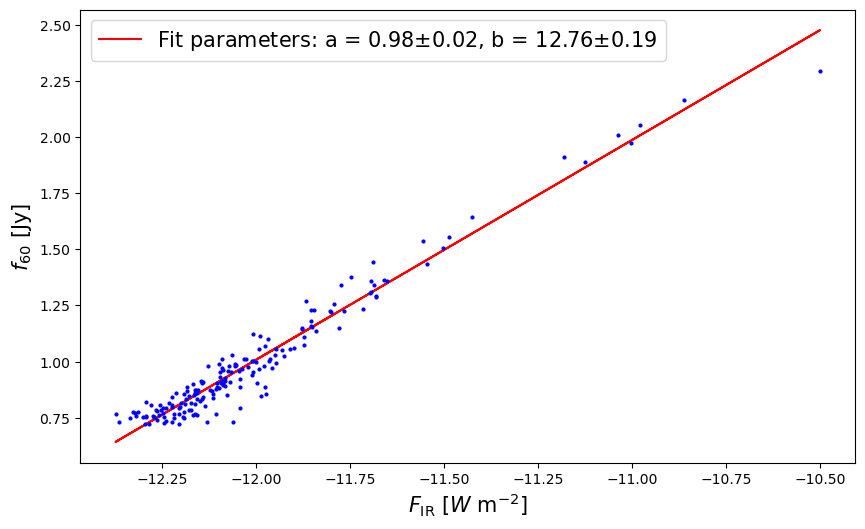

In [15]:

fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

plt.errorbar(np.log10(Fir_RBGS),np.log10(f60_density),xerr = None, yerr = None, ls = "none", marker = 'o',color = 'blue',ms= 2)
plt.plot(np.log10(Fir_RBGS), func(np.log10(Fir_RBGS),popt[0],popt[1]), 
         label = 'Fit parameters: a = ' + str(round(popt[0],2)) + '$ \pm $' + str(round(unc_a,2)) +
         ', b = ' + str(round(popt[1],2)) + '$ \pm $' +str(round(unc_b,2)), color = 'red')
plt.xlabel('$F_{\mathrm{IR}}$ [$W$ m$^{-2}$]', fontsize = 15)
plt.ylabel('$f_{60}$ [Jy]', fontsize = 15)
plt.legend(fontsize = 15)

In [13]:
def Complete(f60_i, LIR_i,a,b):
    f60_threshold = f60_i
    LIR_threshold = pow(10,LIR_i)*3.82e26
    expo = pow(a,-1)*np.log10(f60_threshold)-(b/a)
    dl = np.sqrt((pow(10,-expo)*LIR_threshold)/(4*np.pi))
    dl_Mpc = (dl*u.m).to(u.Mpc).value
    return [round(dl_Mpc,2),round(z_at_value(Planck18.luminosity_distance,dl_Mpc*u.Mpc),4)]

In [14]:
Complete(5.24, 11, popt[0],popt[1])

[79.35, 0.0177]